In [1]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.core.series import Series
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import sys
from tabulate import tabulate

sys.path.append("../../../")

from learning_algorithm.nutrition.algo import NutritionCalculator
from learning_algorithm.nutrition.model import FoodIntakeType, Nutrition, Sex

In [2]:
menu_items = pd.read_csv('../tests/data/starbucks.csv', index_col=0)

# Hypothesis Testing

In [3]:
menu_items.describe()

,calories,fat,carb,fiber,protein
count,77.000000,77.000000,77.000000,77.000000,77.000000
mean,338.831169,13.766234,44.870130,2.220779,9.480519
std,105.368701,7.095488,16.551634,2.112764,8.079556
min,80.000000,0.000000,16.000000,0.000000,0.000000
25%,300.000000,9.000000,31.000000,0.000000,5.000000
50%,350.000000,13.000000,45.000000,2.000000,7.000000
75%,420.000000,18.000000,59.000000,4.000000,15.000000
max,500.000000,28.000000,80.000000,7.000000,34.000000


In [4]:
# Number of null values per column:
menu_items.isnull().sum()

item        0
calories    0
fat         0
carb        0
fiber       0
protein     0
type        0
dtype: int64

In [5]:
nutrient_columns = ['calories', 'fat', 'carb', 'fiber', 'protein']
score_columns = ['caloric_intake_score', 'fat_intake_score', 'carb_intake_score', 'fiber_intake_score', 'protein_intake_score', 'composite_intake_score']

In [6]:
for name in nutrient_columns:
    column = menu_items[name]
    count = (column == 0).sum()
    print(f"Zeros in column {name} -> {count}")

Zeros in column calories -> 0
Zeros in column fat -> 1
Zeros in column carb -> 0
Zeros in column fiber -> 29
Zeros in column protein -> 9


In [7]:
len(menu_items[menu_items.fiber == 0])

29

In [8]:
menu_items[menu_items.fiber == 0]

,item,calories,fat,carb,fiber,protein,type
3,Apple Fritter,420,20.0,59,0,5,bakery
5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery
8,Bountiful Blueberry Muffin,370,14.0,55,0,6,bakery
9,Butter Croissant,310,18.0,32,0,5,bakery
10,Cheese Danish,420,25.0,39,0,7,bakery
19,Double Fudge Mini Doughnut,130,7.0,16,0,0,bakery
21,Ginger Molasses Cookie,360,12.0,58,0,3,bakery
22,Iced Lemon Pound Cake,490,23.0,67,0,5,bakery
23,Mallorca Sweet Bread,420,25.0,42,0,7,bakery
25,Marble Pound Cake,350,13.0,54,0,6,bakery


In [9]:
len(menu_items[menu_items.protein == 0])

9

In [10]:
menu_items[menu_items.protein == 0]

,item,calories,fat,carb,fiber,protein,type
5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery
19,Double Fudge Mini Doughnut,130,7.0,16,0,0,bakery
26,Marshmallow Dream Bar,210,4.0,43,0,0,bakery
31,Petite Vanilla Bean Scone,140,5.0,21,0,0,bakery
51,Birthday Cake Pop,170,9.0,22,0,0,petite
54,Chocolate Creme Whoopie Pie,190,11.0,23,0,0,petite
57,Red Velvet Whoopie Pie,190,11.0,21,0,0,petite
58,Tiramisu Cake Pop,170,9.0,22,0,0,petite
67,Deluxe Fruit Blend,80,0.0,20,2,0,salad


In [11]:
len(menu_items[menu_items.fat == 0])

1

In [12]:
menu_items[menu_items.fat == 0]

,item,calories,fat,carb,fiber,protein,type
67,Deluxe Fruit Blend,80,0.0,20,2,0,salad


In [13]:
menu_items.columns

Index(['item', 'calories', 'fat', 'carb', 'fiber', 'protein', 'type'], dtype='object')

In [14]:
menu_items.head()

,item,calories,fat,carb,fiber,protein,type
1,8-Grain Roll,350,8.0,67,5,10,bakery
2,Apple Bran Muffin,350,9.0,64,7,6,bakery
3,Apple Fritter,420,20.0,59,0,5,bakery
4,Banana Nut Loaf,490,19.0,75,4,7,bakery
5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery


In [15]:
menu_items['type'].unique()

array(['bakery', 'bistro box', 'petite', 'hot breakfast', 'salad',
       'sandwich', 'parfait'], dtype=object)

In [16]:
menu_items[nutrient_columns] = menu_items.groupby('type')[nutrient_columns].transform(lambda row: row.fillna(row.median()))

In [17]:
def get_nutrition(row: Series) -> Nutrition:
    return Nutrition(item=row["item"],
                     calories=row["calories"],
                     fiber=row["fiber"],
                     fat=row["fat"],
                     carb=row["carb"],
                     protein=row["protein"])

In [18]:
menu_items["nutrition"] = menu_items.apply(lambda row: get_nutrition(row), axis=1)

In [19]:
menu_items["caloric_intake_score"] = menu_items["nutrition"].apply(lambda nutrition: NutritionCalculator.get_caloric_intake_score(nutrition, Sex.COMBINE))
menu_items["fat_intake_score"] = menu_items["nutrition"].apply(lambda nutrition: NutritionCalculator.get_fat_intake_score(nutrition, Sex.COMBINE))
menu_items["carb_intake_score"] = menu_items["nutrition"].apply(lambda nutrition: NutritionCalculator.get_carbohyrate_intake_score(nutrition, Sex.COMBINE))
menu_items["fiber_intake_score"] = menu_items["nutrition"].apply(lambda nutrition: NutritionCalculator.get_fiber_intake_score(nutrition, Sex.COMBINE))
menu_items["protein_intake_score"] = menu_items["nutrition"].apply(lambda nutrition: NutritionCalculator.get_protein_intake_score(nutrition, Sex.COMBINE))
menu_items["composite_intake_score"] = menu_items["nutrition"].apply(lambda nutrition: NutritionCalculator.get_composite_nutrition_score(nutrition, Sex.COMBINE))

In [20]:
menu_items

,item,calories,fat,carb,fiber,protein,type,nutrition,caloric_intake_score,fat_intake_score,carb_intake_score,fiber_intake_score,protein_intake_score,composite_intake_score
1,8-Grain Roll,350,8.0,67,5,10,bakery,"Nutrition(item='8-Grain Roll', calories=350, f...",0.027451,0.048485,0.032157,0.028490,0.016420,0.034255
2,Apple Bran Muffin,350,9.0,64,7,6,bakery,"Nutrition(item='Apple Bran Muffin', calories=3...",0.027451,0.054545,0.030718,0.039886,0.009852,0.036596
3,Apple Fritter,420,20.0,59,0,5,bakery,"Nutrition(item='Apple Fritter', calories=420, ...",0.032941,0.121212,0.028318,0.000000,0.008210,0.053967
4,Banana Nut Loaf,490,19.0,75,4,7,bakery,"Nutrition(item='Banana Nut Loaf', calories=490...",0.038431,0.115152,0.035997,0.022792,0.011494,0.058050
5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery,"Nutrition(item='Birthday Cake Mini Doughnut', ...",0.010196,0.036364,0.008159,0.000000,0.000000,0.016110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Tarragon Chicken Salad Sandwich,420,13.0,46,6,32,sandwich,Nutrition(item='Tarragon Chicken Salad Sandwic...,0.032941,0.078788,0.022078,0.034188,0.052545,0.045627
74,Turkey & Swiss Sandwich,390,13.0,36,2,34,sandwich,"Nutrition(item='Turkey & Swiss Sandwich', calo...",0.030588,0.078788,0.017279,0.011396,0.055829,0.041729
75,Greek Yogurt Honey Parfait,300,12.0,44,0,8,parfait,"Nutrition(item='Greek Yogurt Honey Parfait', c...",0.023529,0.072727,0.021118,0.000000,0.013136,0.034934
76,Peach Raspberry Yogurt Parfait,300,4.0,57,3,10,parfait,Nutrition(item='Peach Raspberry Yogurt Parfait...,0.023529,0.024242,0.027358,0.017094,0.016420,0.023510


In [21]:
label_encoder = LabelEncoder()
menu_items['type_numeric'] = label_encoder.fit_transform(menu_items['type'])
menu_items

,item,calories,fat,carb,fiber,protein,type,nutrition,caloric_intake_score,fat_intake_score,carb_intake_score,fiber_intake_score,protein_intake_score,composite_intake_score,type_numeric
1,8-Grain Roll,350,8.0,67,5,10,bakery,"Nutrition(item='8-Grain Roll', calories=350, f...",0.027451,0.048485,0.032157,0.028490,0.016420,0.034255,0
2,Apple Bran Muffin,350,9.0,64,7,6,bakery,"Nutrition(item='Apple Bran Muffin', calories=3...",0.027451,0.054545,0.030718,0.039886,0.009852,0.036596,0
3,Apple Fritter,420,20.0,59,0,5,bakery,"Nutrition(item='Apple Fritter', calories=420, ...",0.032941,0.121212,0.028318,0.000000,0.008210,0.053967,0
4,Banana Nut Loaf,490,19.0,75,4,7,bakery,"Nutrition(item='Banana Nut Loaf', calories=490...",0.038431,0.115152,0.035997,0.022792,0.011494,0.058050,0
5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery,"Nutrition(item='Birthday Cake Mini Doughnut', ...",0.010196,0.036364,0.008159,0.000000,0.000000,0.016110,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Tarragon Chicken Salad Sandwich,420,13.0,46,6,32,sandwich,Nutrition(item='Tarragon Chicken Salad Sandwic...,0.032941,0.078788,0.022078,0.034188,0.052545,0.045627,6
74,Turkey & Swiss Sandwich,390,13.0,36,2,34,sandwich,"Nutrition(item='Turkey & Swiss Sandwich', calo...",0.030588,0.078788,0.017279,0.011396,0.055829,0.041729,6
75,Greek Yogurt Honey Parfait,300,12.0,44,0,8,parfait,"Nutrition(item='Greek Yogurt Honey Parfait', c...",0.023529,0.072727,0.021118,0.000000,0.013136,0.034934,3
76,Peach Raspberry Yogurt Parfait,300,4.0,57,3,10,parfait,Nutrition(item='Peach Raspberry Yogurt Parfait...,0.023529,0.024242,0.027358,0.017094,0.016420,0.023510,3


In [22]:
label_encoder = LabelEncoder()
menu_items['item_numeric'] = label_encoder.fit_transform(menu_items['item'])
menu_items

,item,calories,fat,carb,fiber,protein,type,nutrition,caloric_intake_score,fat_intake_score,carb_intake_score,fiber_intake_score,protein_intake_score,composite_intake_score,type_numeric,item_numeric
1,8-Grain Roll,350,8.0,67,5,10,bakery,"Nutrition(item='8-Grain Roll', calories=350, f...",0.027451,0.048485,0.032157,0.028490,0.016420,0.034255,0,0
2,Apple Bran Muffin,350,9.0,64,7,6,bakery,"Nutrition(item='Apple Bran Muffin', calories=3...",0.027451,0.054545,0.030718,0.039886,0.009852,0.036596,0,1
3,Apple Fritter,420,20.0,59,0,5,bakery,"Nutrition(item='Apple Fritter', calories=420, ...",0.032941,0.121212,0.028318,0.000000,0.008210,0.053967,0,2
4,Banana Nut Loaf,490,19.0,75,4,7,bakery,"Nutrition(item='Banana Nut Loaf', calories=490...",0.038431,0.115152,0.035997,0.022792,0.011494,0.058050,0,5
5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery,"Nutrition(item='Birthday Cake Mini Doughnut', ...",0.010196,0.036364,0.008159,0.000000,0.000000,0.016110,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Tarragon Chicken Salad Sandwich,420,13.0,46,6,32,sandwich,Nutrition(item='Tarragon Chicken Salad Sandwic...,0.032941,0.078788,0.022078,0.034188,0.052545,0.045627,6,70
74,Turkey & Swiss Sandwich,390,13.0,36,2,34,sandwich,"Nutrition(item='Turkey & Swiss Sandwich', calo...",0.030588,0.078788,0.017279,0.011396,0.055829,0.041729,6,73
75,Greek Yogurt Honey Parfait,300,12.0,44,0,8,parfait,"Nutrition(item='Greek Yogurt Honey Parfait', c...",0.023529,0.072727,0.021118,0.000000,0.013136,0.034934,3,36
76,Peach Raspberry Yogurt Parfait,300,4.0,57,3,10,parfait,Nutrition(item='Peach Raspberry Yogurt Parfait...,0.023529,0.024242,0.027358,0.017094,0.016420,0.023510,3,48


In [23]:
menu_items[['type_numeric', 'type']].value_counts(ascending=True)

type_numeric  type         
5             salad             1
3             parfait           3
6             sandwich          7
1             bistro box        8
2             hot breakfast     8
4             petite            9
0             bakery           41
Name: count, dtype: int64

In [24]:
type_categories = ['salad', 'parfait', 'petite', 'hot breakfast', 'sandwich', 'bakery', 'bistro box']
colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange', 'lightpink', 'purple', 'yellow']


type_mapping = {menu_item: color for i, (menu_item, color) in enumerate(zip(type_categories, colors))}
type_mapping

{'salad': 'skyblue',
 'parfait': 'lightgreen',
 'petite': 'lightcoral',
 'hot breakfast': 'orange',
 'sandwich': 'lightpink',
 'bakery': 'purple',
 'bistro box': 'yellow'}

In [25]:
menu_items['color'] = menu_items['type'].map(lambda x: type_mapping[x])
menu_items

,item,calories,fat,carb,fiber,protein,type,nutrition,caloric_intake_score,fat_intake_score,carb_intake_score,fiber_intake_score,protein_intake_score,composite_intake_score,type_numeric,item_numeric,color
1,8-Grain Roll,350,8.0,67,5,10,bakery,"Nutrition(item='8-Grain Roll', calories=350, f...",0.027451,0.048485,0.032157,0.028490,0.016420,0.034255,0,0,purple
2,Apple Bran Muffin,350,9.0,64,7,6,bakery,"Nutrition(item='Apple Bran Muffin', calories=3...",0.027451,0.054545,0.030718,0.039886,0.009852,0.036596,0,1,purple
3,Apple Fritter,420,20.0,59,0,5,bakery,"Nutrition(item='Apple Fritter', calories=420, ...",0.032941,0.121212,0.028318,0.000000,0.008210,0.053967,0,2,purple
4,Banana Nut Loaf,490,19.0,75,4,7,bakery,"Nutrition(item='Banana Nut Loaf', calories=490...",0.038431,0.115152,0.035997,0.022792,0.011494,0.058050,0,5,purple
5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery,"Nutrition(item='Birthday Cake Mini Doughnut', ...",0.010196,0.036364,0.008159,0.000000,0.000000,0.016110,0,6,purple
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Tarragon Chicken Salad Sandwich,420,13.0,46,6,32,sandwich,Nutrition(item='Tarragon Chicken Salad Sandwic...,0.032941,0.078788,0.022078,0.034188,0.052545,0.045627,6,70,lightpink
74,Turkey & Swiss Sandwich,390,13.0,36,2,34,sandwich,"Nutrition(item='Turkey & Swiss Sandwich', calo...",0.030588,0.078788,0.017279,0.011396,0.055829,0.041729,6,73,lightpink
75,Greek Yogurt Honey Parfait,300,12.0,44,0,8,parfait,"Nutrition(item='Greek Yogurt Honey Parfait', c...",0.023529,0.072727,0.021118,0.000000,0.013136,0.034934,3,36,lightgreen
76,Peach Raspberry Yogurt Parfait,300,4.0,57,3,10,parfait,Nutrition(item='Peach Raspberry Yogurt Parfait...,0.023529,0.024242,0.027358,0.017094,0.016420,0.023510,3,48,lightgreen


In [26]:
overall_scores = menu_items.groupby('type')[score_columns].agg('median').drop_duplicates()

In [27]:
overall_scores = overall_scores.sort_values('composite_intake_score')
overall_scores

,caloric_intake_score,fat_intake_score,carb_intake_score,fiber_intake_score,protein_intake_score,composite_intake_score
type,,,,,,
salad,0.006275,0.000000,0.009599,0.011396,0.000000,0.005256
petite,0.014118,0.054545,0.011039,0.000000,0.003284,0.023142
parfait,0.023529,0.024242,0.027358,0.017094,0.013136,0.023510
hot breakfast,0.026275,0.078788,0.015359,0.008547,0.028736,0.038803
sandwich,0.030588,0.078788,0.021118,0.017094,0.042693,0.041729
bakery,0.029020,0.096970,0.027358,0.011396,0.009852,0.043958
bistro box,0.029804,0.115152,0.016079,0.031339,0.028736,0.051810


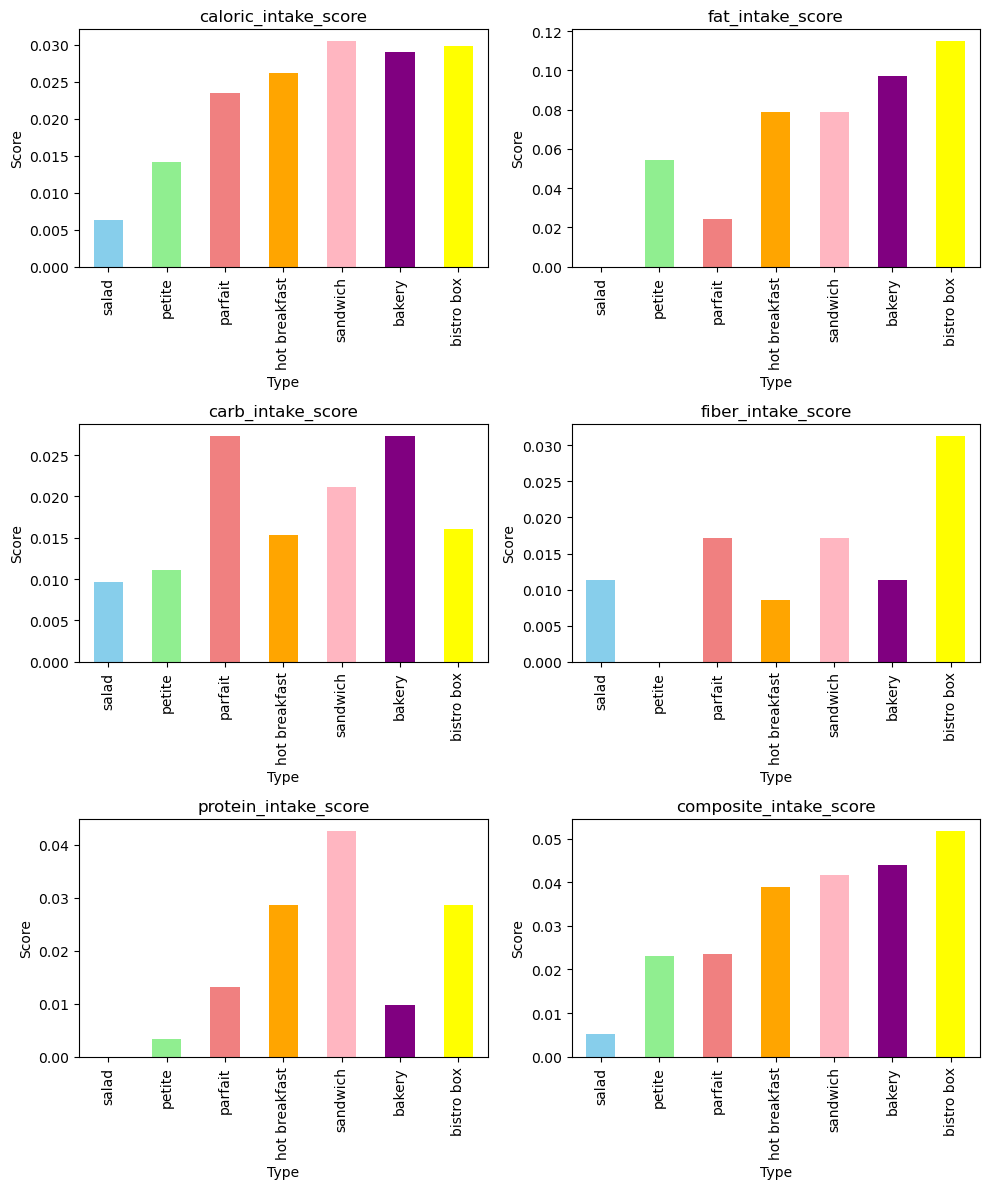

In [28]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))

for i, column in enumerate(overall_scores.columns):
    row, col = divmod(i, 2)
    overall_scores[column].plot(kind='bar', ax=axes[row, col], color=colors)
    axes[row, col].set_title(column)
    axes[row, col].set_xlabel('Type')
    axes[row, col].set_ylabel('Score')

plt.tight_layout()
plt.show()

# Based on our nutritional model salads are indeed the most healthy meal.  Therefore, we do not reject the Null Hypothesis based on the fact that salads have the lowest composite score.  Therefore, we reject the Alternative Hypothes  in that salads are not the most unhealthy meal.

# Cluster Analysis

## Visualization

In [78]:
x = menu_items['calories'].values
x

array([350, 350, 420, 490, 130, 370, 460, 370, 310, 420, 380, 320, 300,
       420, 310, 480, 490, 410, 130, 280, 360, 490, 420, 440, 350, 210,
       350, 300, 420, 370, 140, 280, 390, 480, 480, 430, 400, 340, 350,
       440, 490, 480, 270, 360, 380, 380, 420, 350, 380, 180, 170, 190,
       170, 190, 180, 160, 190, 170, 350, 300, 350, 500, 290, 140, 320,
       350,  80, 400, 460, 360, 390, 350, 420, 390, 300, 300, 300])

In [79]:
x.shape

(77,)

In [80]:
y = menu_items['caloric_intake_score'].values
y

array([0.02745098, 0.02745098, 0.03294118, 0.03843137, 0.01019608,
       0.02901961, 0.03607843, 0.02901961, 0.02431373, 0.03294118,
       0.02980392, 0.02509804, 0.02352941, 0.03294118, 0.02431373,
       0.03764706, 0.03843137, 0.03215686, 0.01019608, 0.02196078,
       0.02823529, 0.03843137, 0.03294118, 0.0345098 , 0.02745098,
       0.01647059, 0.02745098, 0.02352941, 0.03294118, 0.02901961,
       0.01098039, 0.02196078, 0.03058824, 0.03764706, 0.03764706,
       0.03372549, 0.03137255, 0.02666667, 0.02745098, 0.0345098 ,
       0.03843137, 0.03764706, 0.02117647, 0.02823529, 0.02980392,
       0.02980392, 0.03294118, 0.02745098, 0.02980392, 0.01411765,
       0.01333333, 0.01490196, 0.01333333, 0.01490196, 0.01411765,
       0.01254902, 0.01490196, 0.01333333, 0.02745098, 0.02352941,
       0.02745098, 0.03921569, 0.0227451 , 0.01098039, 0.02509804,
       0.02745098, 0.00627451, 0.03137255, 0.03607843, 0.02823529,
       0.03058824, 0.02745098, 0.03294118, 0.03058824, 0.02352

In [81]:
# Draw a line of regression through the points
m, b = np.polyfit(x, y, 1)

In [82]:
# Slope
m

7.843137254901962e-05

In [83]:
# Y-Intercept
b

2.6572169616583993e-18

In [84]:
x_fit = np.linspace(x.min(), x.max(), 100)
x_fit

array([ 80.        ,  84.24242424,  88.48484848,  92.72727273,
        96.96969697, 101.21212121, 105.45454545, 109.6969697 ,
       113.93939394, 118.18181818, 122.42424242, 126.66666667,
       130.90909091, 135.15151515, 139.39393939, 143.63636364,
       147.87878788, 152.12121212, 156.36363636, 160.60606061,
       164.84848485, 169.09090909, 173.33333333, 177.57575758,
       181.81818182, 186.06060606, 190.3030303 , 194.54545455,
       198.78787879, 203.03030303, 207.27272727, 211.51515152,
       215.75757576, 220.        , 224.24242424, 228.48484848,
       232.72727273, 236.96969697, 241.21212121, 245.45454545,
       249.6969697 , 253.93939394, 258.18181818, 262.42424242,
       266.66666667, 270.90909091, 275.15151515, 279.39393939,
       283.63636364, 287.87878788, 292.12121212, 296.36363636,
       300.60606061, 304.84848485, 309.09090909, 313.33333333,
       317.57575758, 321.81818182, 326.06060606, 330.3030303 ,
       334.54545455, 338.78787879, 343.03030303, 347.27

In [85]:
y_fit = m * x_fit + b
y_fit

array([0.00627451, 0.00660725, 0.00693999, 0.00727273, 0.00760547,
       0.00793821, 0.00827094, 0.00860368, 0.00893642, 0.00926916,
       0.0096019 , 0.00993464, 0.01026738, 0.01060012, 0.01093286,
       0.0112656 , 0.01159834, 0.01193108, 0.01226381, 0.01259655,
       0.01292929, 0.01326203, 0.01359477, 0.01392751, 0.01426025,
       0.01459299, 0.01492573, 0.01525847, 0.01559121, 0.01592395,
       0.01625668, 0.01658942, 0.01692216, 0.0172549 , 0.01758764,
       0.01792038, 0.01825312, 0.01858586, 0.0189186 , 0.01925134,
       0.01958408, 0.01991682, 0.02024955, 0.02058229, 0.02091503,
       0.02124777, 0.02158051, 0.02191325, 0.02224599, 0.02257873,
       0.02291147, 0.02324421, 0.02357695, 0.02390969, 0.02424242,
       0.02457516, 0.0249079 , 0.02524064, 0.02557338, 0.02590612,
       0.02623886, 0.0265716 , 0.02690434, 0.02723708, 0.02756982,
       0.02790255, 0.02823529, 0.02856803, 0.02890077, 0.02923351,
       0.02956625, 0.02989899, 0.03023173, 0.03056447, 0.03089

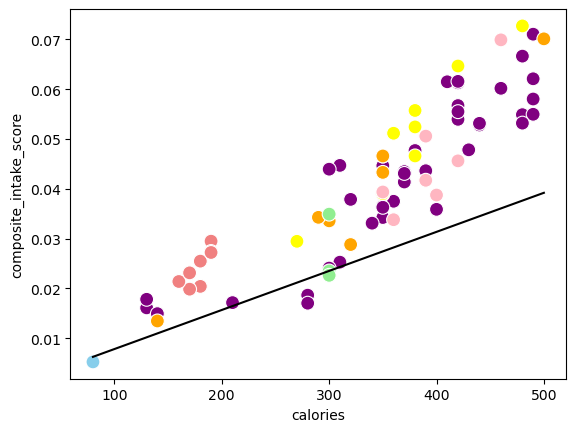

In [86]:
plt.figure()
sns.scatterplot(data=menu_items, 
                x='calories', 
                y='composite_intake_score', 
                s=100,
                hue=menu_items['type'].values, 
                palette=type_mapping,
                legend=False)
plt.plot(x_fit, y_fit, color='black', label='Line of best fit')
plt.show()

In [87]:
x = menu_items[['calories', 'caloric_intake_score', 'fat_intake_score', 'carb_intake_score', 'fiber_intake_score', 'protein_intake_score', 'composite_intake_score']].values
x

array([[3.50000000e+02, 2.74509804e-02, 4.84848485e-02, 3.21574274e-02,
        2.84900285e-02, 1.64203612e-02, 3.42548041e-02],
       [3.50000000e+02, 2.74509804e-02, 5.45454545e-02, 3.07175426e-02,
        3.98860399e-02, 9.85221675e-03, 3.65962028e-02],
       [4.20000000e+02, 3.29411765e-02, 1.21212121e-01, 2.83177346e-02,
        0.00000000e+00, 8.21018062e-03, 5.39671041e-02],
       [4.90000000e+02, 3.84313725e-02, 1.15151515e-01, 3.59971202e-02,
        2.27920228e-02, 1.14942529e-02, 5.80497739e-02],
       [1.30000000e+02, 1.01960784e-02, 3.63636364e-02, 8.15934725e-03,
        0.00000000e+00, 0.00000000e+00, 1.61095878e-02],
       [3.70000000e+02, 2.90196078e-02, 8.48484848e-02, 2.25581953e-02,
        2.84900285e-02, 9.85221675e-03, 4.34646610e-02],
       [4.60000000e+02, 3.60784314e-02, 1.33333333e-01, 2.92776578e-02,
        1.13960114e-02, 1.14942529e-02, 6.01972963e-02],
       [3.70000000e+02, 2.90196078e-02, 8.48484848e-02, 2.63978882e-02,
        0.00000000e+00, 9

In [88]:
x.shape

(77, 7)

In [89]:
## Model
wcss = []

for i in range(1, 11):
    model = KMeans(n_clusters=i, init='k-means++', random_state=42)
    model.fit(x)
    wcss.append(model.inertia_)
    
wcss

/Users/facts/mambaforge/envs/learning_algorithm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/facts/mambaforge/envs/learning_algorithm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/facts/mambaforge/envs/learning_algorithm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/facts/mambaforge/envs/learning_algorithm/lib/python3.9/site-packages/

[843794.9995556157,
 259428.75670554079,
 86962.9024617131,
 47263.248660073456,
 26864.13174520286,
 16034.128464591737,
 11237.771138768794,
 8817.770237237743,
 6886.3396823273,
 5468.158614879898]

Text(0, 0.5, 'WCSS')

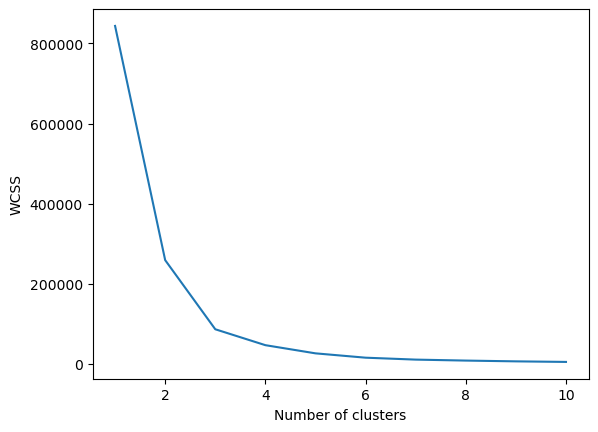

In [90]:
# The following elbow chart tells us that the optimal number of clusters should be 4 even we have 7 different menu item types.

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [91]:
model = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = model.fit_predict(x)
y_kmeans

/Users/facts/mambaforge/envs/learning_algorithm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([3, 3, 0, 0, 1, 3, 0, 3, 2, 0, 3, 2, 2, 0, 2, 0, 0, 0, 1, 2, 3, 0,
       0, 0, 3, 1, 3, 2, 0, 3, 1, 2, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0, 2, 3,
       3, 3, 0, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 0, 2, 1, 2, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 2, 2, 2], dtype=int32)

In [92]:
len(y_kmeans)

77

In [93]:
menu_items['cluster'] = y_kmeans
menu_items

,item,calories,fat,carb,fiber,protein,type,nutrition,caloric_intake_score,fat_intake_score,carb_intake_score,fiber_intake_score,protein_intake_score,composite_intake_score,type_numeric,item_numeric,color,cluster
1,8-Grain Roll,350,8.0,67,5,10,bakery,"Nutrition(item='8-Grain Roll', calories=350, f...",0.027451,0.048485,0.032157,0.028490,0.016420,0.034255,0,0,purple,3
2,Apple Bran Muffin,350,9.0,64,7,6,bakery,"Nutrition(item='Apple Bran Muffin', calories=3...",0.027451,0.054545,0.030718,0.039886,0.009852,0.036596,0,1,purple,3
3,Apple Fritter,420,20.0,59,0,5,bakery,"Nutrition(item='Apple Fritter', calories=420, ...",0.032941,0.121212,0.028318,0.000000,0.008210,0.053967,0,2,purple,0
4,Banana Nut Loaf,490,19.0,75,4,7,bakery,"Nutrition(item='Banana Nut Loaf', calories=490...",0.038431,0.115152,0.035997,0.022792,0.011494,0.058050,0,5,purple,0
5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery,"Nutrition(item='Birthday Cake Mini Doughnut', ...",0.010196,0.036364,0.008159,0.000000,0.000000,0.016110,0,6,purple,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Tarragon Chicken Salad Sandwich,420,13.0,46,6,32,sandwich,Nutrition(item='Tarragon Chicken Salad Sandwic...,0.032941,0.078788,0.022078,0.034188,0.052545,0.045627,6,70,lightpink,0
74,Turkey & Swiss Sandwich,390,13.0,36,2,34,sandwich,"Nutrition(item='Turkey & Swiss Sandwich', calo...",0.030588,0.078788,0.017279,0.011396,0.055829,0.041729,6,73,lightpink,3
75,Greek Yogurt Honey Parfait,300,12.0,44,0,8,parfait,"Nutrition(item='Greek Yogurt Honey Parfait', c...",0.023529,0.072727,0.021118,0.000000,0.013136,0.034934,3,36,lightgreen,2
76,Peach Raspberry Yogurt Parfait,300,4.0,57,3,10,parfait,Nutrition(item='Peach Raspberry Yogurt Parfait...,0.023529,0.024242,0.027358,0.017094,0.016420,0.023510,3,48,lightgreen,2


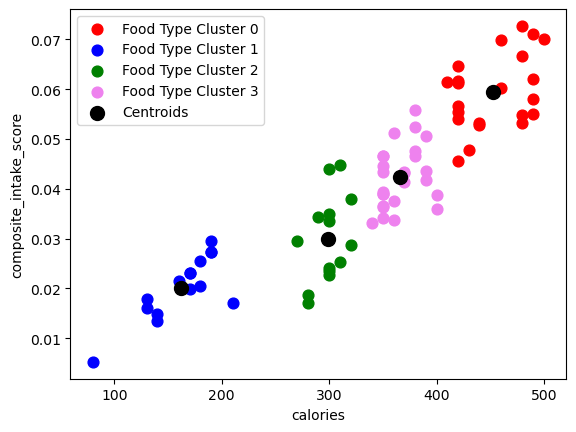

In [94]:
cluster_color_map = {0: 'red', 1: 'blue', 2: 'green', 3: 'violet'}

for i in range(0, 4):
    plt.scatter(x[y_kmeans == i, 0], x[y_kmeans == i, 6], s=60, c=cluster_color_map[i], label=f'Food Type Cluster {i}')
    
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 6], s = 100, c='black', label='Centroids')
plt.xlabel('calories')
plt.ylabel('composite_intake_score')
plt.legend()
plt.show()

In [100]:
x

array([[3.50000000e+02, 2.74509804e-02, 4.84848485e-02, 3.21574274e-02,
        2.84900285e-02, 1.64203612e-02, 3.42548041e-02],
       [3.50000000e+02, 2.74509804e-02, 5.45454545e-02, 3.07175426e-02,
        3.98860399e-02, 9.85221675e-03, 3.65962028e-02],
       [4.20000000e+02, 3.29411765e-02, 1.21212121e-01, 2.83177346e-02,
        0.00000000e+00, 8.21018062e-03, 5.39671041e-02],
       [4.90000000e+02, 3.84313725e-02, 1.15151515e-01, 3.59971202e-02,
        2.27920228e-02, 1.14942529e-02, 5.80497739e-02],
       [1.30000000e+02, 1.01960784e-02, 3.63636364e-02, 8.15934725e-03,
        0.00000000e+00, 0.00000000e+00, 1.61095878e-02],
       [3.70000000e+02, 2.90196078e-02, 8.48484848e-02, 2.25581953e-02,
        2.84900285e-02, 9.85221675e-03, 4.34646610e-02],
       [4.60000000e+02, 3.60784314e-02, 1.33333333e-01, 2.92776578e-02,
        1.13960114e-02, 1.14942529e-02, 6.01972963e-02],
       [3.70000000e+02, 2.90196078e-02, 8.48484848e-02, 2.63978882e-02,
        0.00000000e+00, 9

In [98]:
x.shape

(77, 7)

In [101]:
y = menu_items['cluster'].values

array([3, 3, 0, 0, 1, 3, 0, 3, 2, 0, 3, 2, 2, 0, 2, 0, 0, 0, 1, 2, 3, 0,
       0, 0, 3, 1, 3, 2, 0, 3, 1, 2, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0, 2, 3,
       3, 3, 0, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 0, 2, 1, 2, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 2, 2, 2], dtype=int32)

In [ ]:
# Calculate the line of best fit
m, b = np.polyfit(x[:, 0], x[:, 6], 1)


In [95]:
# ŷ = β0 + calories * x1j + composite_intake_score * x2j
# and the actual output value of the cluster as
# y = cluster
menu_items[["item", "calories", "composite_intake_score", "cluster"]]

,item,calories,composite_intake_score,cluster
1,8-Grain Roll,350,0.034255,3
2,Apple Bran Muffin,350,0.036596,3
3,Apple Fritter,420,0.053967,0
4,Banana Nut Loaf,490,0.058050,0
5,Birthday Cake Mini Doughnut,130,0.016110,1
...,...,...,...,...
73,Tarragon Chicken Salad Sandwich,420,0.045627,0
74,Turkey & Swiss Sandwich,390,0.041729,3
75,Greek Yogurt Honey Parfait,300,0.034934,2
76,Peach Raspberry Yogurt Parfait,300,0.023510,2
